<a href="https://colab.research.google.com/github/yash312312/predicting-words/blob/main/All_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install --upgrade gensim --user
!pip install transformers
!pip install datasets transformers

     |████████████████████████████████| 24.1 MB 1.9 MB/s 
     |████████████████████████████████| 4.0 MB 25.5 MB/s 
     |████████████████████████████████| 596 kB 44.5 MB/s 
     |████████████████████████████████| 6.6 MB 56.7 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 880 kB 41.6 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=e3bd5476a14f60d7a58fa86670795eaa889e9bd1319492993e3a332c559447e2
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 342 kB 28.3 MB/s 
     |████████████████████████████████| 212 kB 33.0 MB/s 
     |████████████████████████████████| 1.1 MB 50.2 MB/s 
     |████████████████████████████

In [ ]:
train_dataset_path = '/content/drive/MyDrive/Datasets/newTrainData.csv'
test_dataset_path = '/content/drive/MyDrive/Datasets/newTestData.csv'
val_dataset_path = '/content/drive/MyDrive/Datasets/newTestData.csv'

In [ ]:
import pandas as pd
train = pd.read_csv(train_dataset_path)
test = pd.read_csv(test_dataset_path)

In [ ]:
train_sentences = train['correct_sentence'].to_list()
train_sentences = [str(s) for s in train_sentences]
train_sentences = [s.split() for s in train_sentences]

In [ ]:
error_sentences = test['error_sentence'].to_list()
error_sentences = [str(s) for s in error_sentences]
error_sentences = [s.split() for s in error_sentences]
error_indices = test['error_word_index'].to_list()
correct_sentences = test['correct_sentence'].to_list()
correct_sentences = [str(s) for s in correct_sentences]
correct_sentences = [s.split() for s in correct_sentences]

#CBOW

In [ ]:
from gensim.models.word2vec import Word2Vec
cbow = Word2Vec(sentences=train_sentences,min_count=1,iter=100,size=300)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=20).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


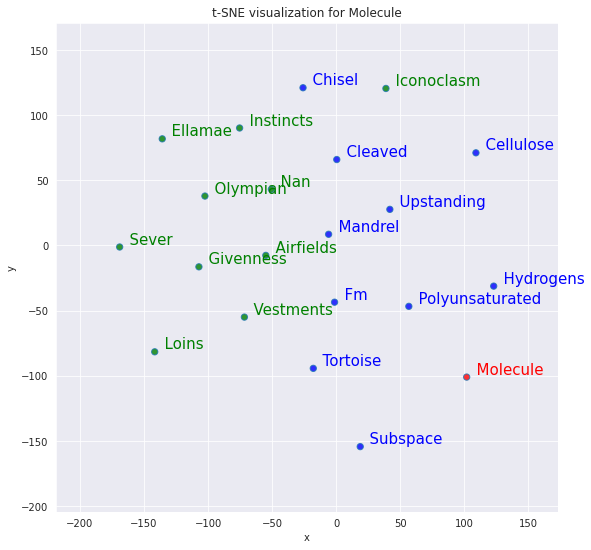

In [ ]:
tsnescatterplot(cbow, 'molecule',[t[0] for t in cbow.wv.most_similar(positive=["molecule"], topn=20)][10:])

In [ ]:
cbow.most_similar(positive = ['how', 'are', 'you'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('theyre', 0.4645628333091736),
 ('we', 0.37830251455307007),
 ('i', 0.3713083863258362),
 ('what', 0.35996055603027344),
 ('they', 0.35402625799179077),
 ('it', 0.34311163425445557),
 ('as', 0.3344251215457916),
 ('not', 0.33382099866867065),
 ('youre', 0.3170509934425354),
 ('he', 0.3147018253803253)]

In [ ]:
cbow_pred = set()
no_errors = 0
no_correct = 0
cbow_set_list = {}
for i in range(len(error_sentences)):
  if no_errors >= 1000:
    break
  ei = error_indices[i]
  es = error_sentences[i]
  cs = correct_sentences[i]
  ew = es[ei]
  ls = []
  #print(cs[2])
  #break
  
  if ei == -1 or cs[ei] not in cbow.wv.vocab:
    continue
  #print("hello")
  window = 6
  w = ei - 1
  k = 0
  while w >= 0 and k < window/2:
    if cs[w] not in cbow.wv.vocab:
      w = w - 1
      continue
    ls.append(cs[w])
    k = k + 1
    w = w - 1
  ls.reverse()

  w = ei + 1
  k = 0 
  while w < len(es) and k < window/2:
    if cs[w] not in cbow.wv.vocab:
      w = w + 1
      continue
    ls.append(cs[w])
    k = k + 1
    w = w + 1
  
  pw = cbow.wv.most_similar(positive=ls, topn=50)
  word_set = []
  for t in pw:
    if len(t[0]) == len(cs[ei]) and sorted(t[0]) == sorted(cs[ei]):
      word_set.append(ei)
      word_set.append(t[0])
      
      if t[0] == cs[ei]:
        no_correct = no_correct + 1
        cbow_pred.add(i)
      break
    # if t[0] == cs[ei]:
    #   # print(es)
    #   # print(cs)
    #   # print(str(ei) + ' ' +cs[ei] + ' ' + str(i))
    #   # print(' ')
    #   no_correct = no_correct +1
    #   break

  if len(word_set) == 0:
    word_set.append(ei)
    word_set.append(pw[0][0])
  
  cbow_set_list[' '.join(cs)] = word_set
  no_errors = no_errors + 1

print(no_errors)
print(no_correct)

1000
143


#BERT

In [ ]:
from transformers import pipeline

mask_filler = pipeline(
    "fill-mask", model="Das282000Prit/fyp-finetuned-brown"
)

Downloading:   0%|          | 0.00/636 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/509M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForMaskedLM.

All the layers of TFBertForMaskedLM were initialized from the model checkpoint at Das282000Prit/fyp-finetuned-brown.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForMaskedLM for predictions without further training.


Downloading:   0%|          | 0.00/321 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
model = mask_filler

In [ ]:
bert_pred = set()

In [ ]:
no_errors = 0
no_correct = 0
bert_set_list = {}
for i in range(len(test)):
  if no_errors >= 1000:
    break
  if i%10 == 0:
    print(i)
  idx = int(test.iloc[i]['error_word_index'])
  if idx == -1:
    continue
  error_sen = test.iloc[i]['error_sentence']
  correct_sen = test.iloc[i]['correct_sentence']
  sen_list = error_sen.split()
  sen_list[idx] = '[MASK]'
  sen_with_mask = ''
  for w in sen_list:
    sen_with_mask = sen_with_mask + ' ' + w
  correct_word = (correct_sen.split())[idx]
  pred = mask_filler(sen_with_mask,top_k = 50)
  word_set = []
  for dic in pred:
    if len(dic['token_str']) == len(correct_word) and sorted(dic['token_str']) == sorted(correct_word):
      word_set.append(idx)
      word_set.append(dic['token_str'])
      if dic['token_str'] == correct_word:
        bert_pred.add(i)
        no_correct = no_correct + 1
      break
    # if dic['token_str'] == correct_word:
    #   no_correct = no_correct + 1
    #   break

  if len(word_set) == 0:
    dic = pred[0]
    word_set.append(idx)
    word_set.append(dic['token_str'])
    
  bert_set_list[correct_sen] = word_set
  no_errors = no_errors + 1

  

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360


In [ ]:
print(no_errors)
print(no_correct)

1000
779


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("Das282000Prit/fyp-finetuned-brown")


In [ ]:
from datasets import load_dataset
test = load_dataset('text', data_files={'test': '/content/drive/MyDrive/Datasets/newTestData.txt'})
encodings = tokenizer("\n\n".join(test), return_tensors="pt")

Using custom data configuration default-e3da8bf57fa3dbf6
Reusing dataset text (/root/.cache/huggingface/datasets/text/default-e3da8bf57fa3dbf6/0.0.0/4b86d314f7236db91f0a0f5cda32d4375445e64c5eda2692655dd99c2dac68e8)


  0%|          | 0/1 [00:00<?, ?it/s]